In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Data loader lib
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('fashion-data/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-data/data/fashion', kind='t10k')

X_train = np.reshape(X_train, (60000, 28, 28, 1))
X_test = np.reshape(X_test, (10000, 28, 28, 1))

X_train = X_train/255.0
X_test = X_test/255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

opt = SGD(lr=1e-2, momentum=0.9, decay=(1e-2) / 10)

In [2]:
model = Sequential([
    #First convolutional Layer
    #Padding is set to same to prevent shrinking feature map in convolutional layer
    #BatchNormalization and Dropout to prevent overfitting
    Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)),
    Activation("relu"),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding="same"),
    Activation("relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    #Second convolutional Layer
    Conv2D(64, (3, 3), padding="same"),
    Activation("relu"),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding="same"),
    Activation("relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    #Flatten and Dense Layers
    Flatten(),
    Dense(128),
    Activation("relu"),
    BatchNormalization(),
    Dropout(0.5),
    
    #Output layer
    Dense(10),
    Activation("softmax"),
])



In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

In [4]:
#Standard compiler
model.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [5]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 180s 3ms/sample - loss: 0.4461 - accuracy: 0.8444 - val_loss: 0.2966 - val_accuracy: 0.8940
Epoch 2/25
60000/60000 [==============================] - 181s 3ms/sample - loss: 0.3022 - accuracy: 0.8925 - val_loss: 0.2421 - val_accuracy: 0.9128
Epoch 3/25
60000/60000 [==============================] - 183s 3ms/sample - loss: 0.2661 - accuracy: 0.9055 - val_loss: 0.2277 - val_accuracy: 0.9193 los
Epoch 4/25
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.2451 - accuracy: 0.9129 - val_loss: 0.2526 - val_accuracy: 0.9045
Epoch 5/25
60000/60000 [==============================] - 173s 3ms/sample - loss: 0.2259 - accuracy: 0.9190 - val_loss: 0.2191 - val_accuracy: 0.9220
Epoch 6/25
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.2130 - accuracy: 0.9231 - val_loss: 0.2059 - val_accuracy: 0.9245
Epoch 7/25
60000/60000 [======================

In [6]:
#LOADING TESTING DATA FOR THE TRAINED MODEL

import os
import cv2
from tqdm import tqdm

CATEGORIES = ["T-shirt","Trouser", "Pullover", "Dress"]
DATADIR = "C:/Users/Anh Bui/Desktop"
testing_data = []

test_data = cv2.imread("C:/Users/Anh Bui/Desktop/T-shirt/fashion.png" ,cv2.IMREAD_GRAYSCALE)

for img in os.listdir("T-shirt/"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("T-shirt/",img) ,cv2.IMREAD_GRAYSCALE)
        img_array = 255 - img_array
        testing_data.append([img_array, 0])
        
for img in os.listdir("Trouser/"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("Trouser/",img) ,cv2.IMREAD_GRAYSCALE)
        img_array = 255 - img_array
        testing_data.append([img_array, 1])
        
for img in os.listdir("Pullover/"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("Pullover/",img) ,cv2.IMREAD_GRAYSCALE)
        img_array = 255 - img_array
        testing_data.append([img_array, 2])
        
for img in os.listdir("Dress/"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("Dress/",img) ,cv2.IMREAD_GRAYSCALE)
        img_array = 255 - img_array
        testing_data.append([img_array, 3])

In [7]:
#Separate Image data set and Label data set
X_test_data = []
y_test_data = []
for test_data in testing_data:
    X_test_data.append(test_data[0])
    y_test_data.append(test_data[1])

In [8]:
#Convert the logits to probabilities for easier interpretation
probability_model = Sequential([model, tf.keras.layers.Softmax()])

In [11]:
#Convert the logits to probabilities for easier interpretation
X_test_data = np.array(X_test_data)
X_test_data = np.reshape(X_test_data, (16, 28, 28, 1))

In [12]:
predictions = probability_model.predict(X_test_data)

In [13]:
#Fetching the maximum probabilities to display the result
result = []
for pred in predictions:
    result.append(np.argmax(pred))
result

[0, 0, 8, 6, 0, 1, 1, 1, 4, 6, 4, 1, 3, 3, 0, 3]

In [14]:
#Drawing methods
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

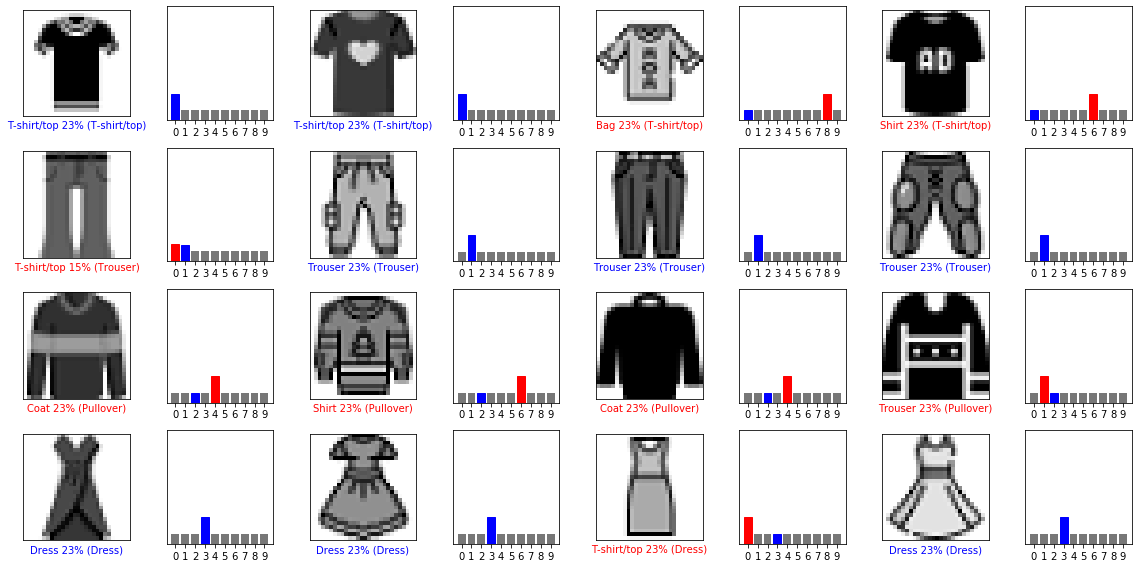

In [16]:
#Drawing results with blue is the true result and red is predicted result
X_test_data = np.reshape(X_test_data, (16, 28, 28))
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test_data, X_test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test_data)
plt.tight_layout()
plt.show()